# Imports

In [95]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

## Prototype Clustering with K-Means

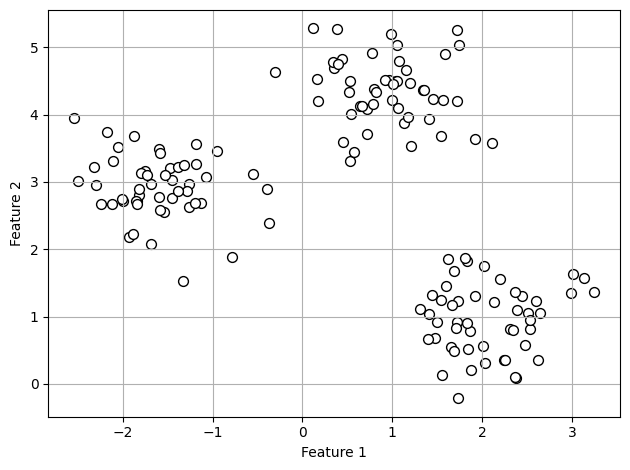

In [78]:
X, y = make_blobs(
    n_samples=150, n_features=2, centers=3, cluster_std=.5, shuffle=True, random_state=0
)

plt.scatter(
    X[:, 0],
    X[:, 1],
    c='white',
    marker='o',
    edgecolor='black',
    s=50
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

### Implementing KMeans

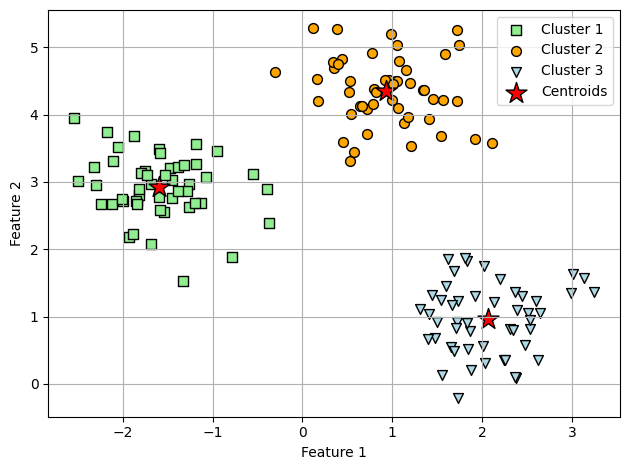

In [79]:
km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

y_km = km.fit_predict(X)

plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Cluster 2'
)

plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='Centroids'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### Elbow Method

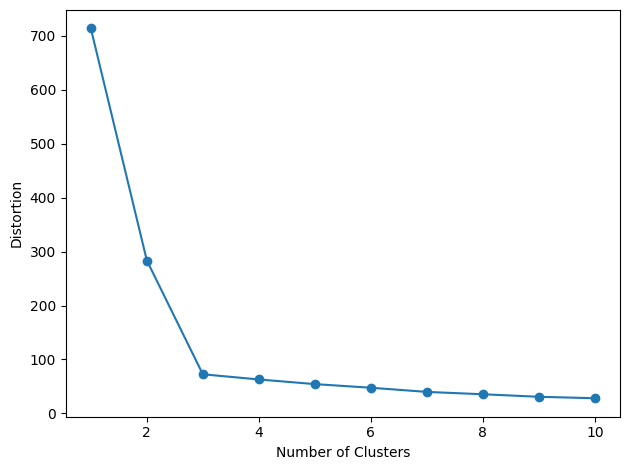

In [80]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.tight_layout()
plt.show()

### Silhouette Coef

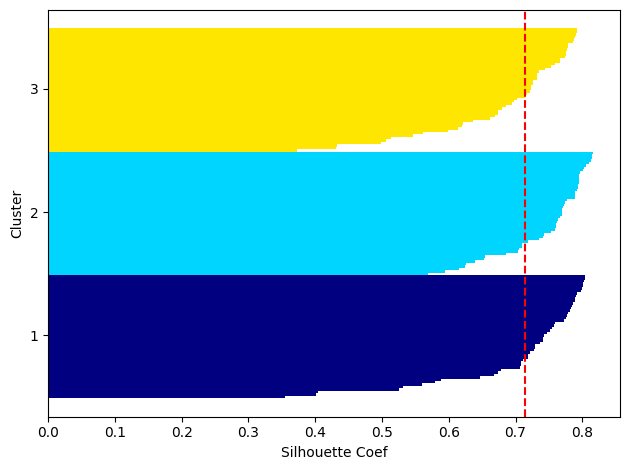

In [81]:
km = KMeans(
    n_clusters=3,
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(
    X, y_km, metric='euclidean'
)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor=None,
        color=color
    )
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')

plt.xlabel("Silhouette Coef")
plt.tight_layout()
plt.show()

### Example of Bad Kmeans Clustering

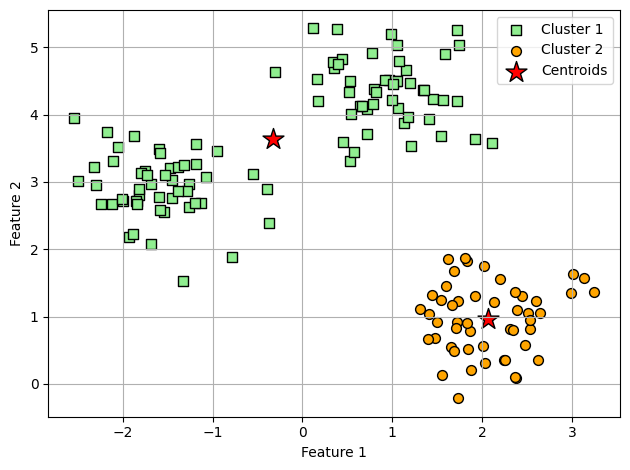

In [82]:
km = KMeans(
    n_clusters=2,
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

y_km = km.fit_predict(X)

plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Cluster 2'
)

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='Centroids'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

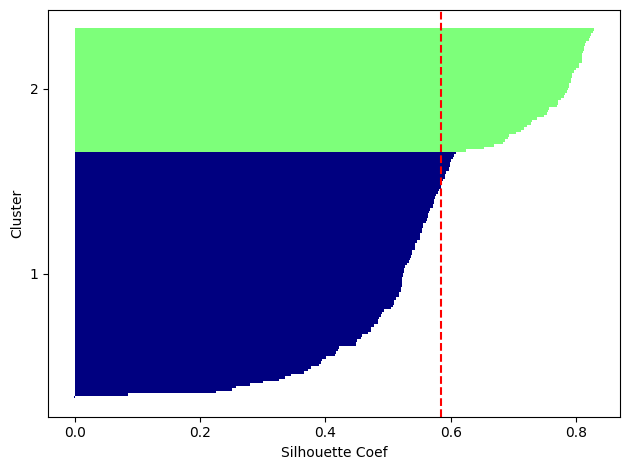

In [83]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(
    X, y_km, metric='euclidean'
)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor=None,
        color=color
    )
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')

plt.xlabel("Silhouette Coef")
plt.tight_layout()
plt.show()

## Agglomerative Heirarchical Clustering 

### Agg. Clustering w/ Complete Linkage (Custom Implementation)

In [84]:
np.random.seed(123)

variables = ['X' ,'Y', 'Z']
labels = [f'ID_{i}' for i in range(5)]

X = np.random.random_sample([5, 3]) * 10

df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


#### Calculating the distance matrix

In [85]:
row_dist = pd.DataFrame(
    squareform(pdist(df, metric='euclidean')),
    columns=labels,
    index=labels
)

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


#### Building a linkage matrix

In [86]:
''' 
    linkage function docs say we can't use the result of squareform, but we can use the result of pdist or simply give our df values 
    so we use the following code
'''

row_clusters = linkage(
    df.values,
    method='complete',
    metric='euclidean'
)

''' or we can do '''
# row_clusters = linkage(
#     pdist(df, metric='euclidean'),
#     method='complete'
# )

row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [87]:
pd.DataFrame(
    row_clusters,
    columns = ['Row Label 1', 'Row Label 2', 'Distance', 'No. of Items in Cluster'],
    index = [f'Cluster {i + 1}' for i in range(row_clusters.shape[0])]
)

,Row Label 1,Row Label 2,Distance,No. of Items in Cluster
Cluster 1,0.0,4.0,3.835396,2.0
Cluster 2,1.0,2.0,4.347073,2.0
Cluster 3,3.0,5.0,5.899885,3.0
Cluster 4,6.0,7.0,8.316594,5.0


#### Dendogram Visualization

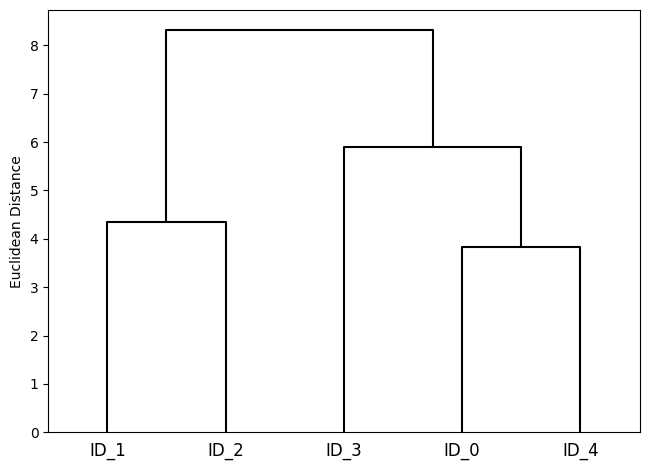

In [88]:
from scipy.cluster.hierarchy import set_link_color_palette

set_link_color_palette(['black']) # setting dendogram color to black (part 1/2)

row_dendr = dendrogram(
    row_clusters,
    labels = labels,
    color_threshold=np.inf # setting dendogram color to black (part 2/2)
)

plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

#### Attaching the dendogram to a heatmap

C:\Users\staff\AppData\Local\Temp\ipykernel_7388\4074907500.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels(['', *df_rowclust.columns.tolist()])
C:\Users\staff\AppData\Local\Temp\ipykernel_7388\4074907500.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels(['', *df_rowclust.index.tolist()])


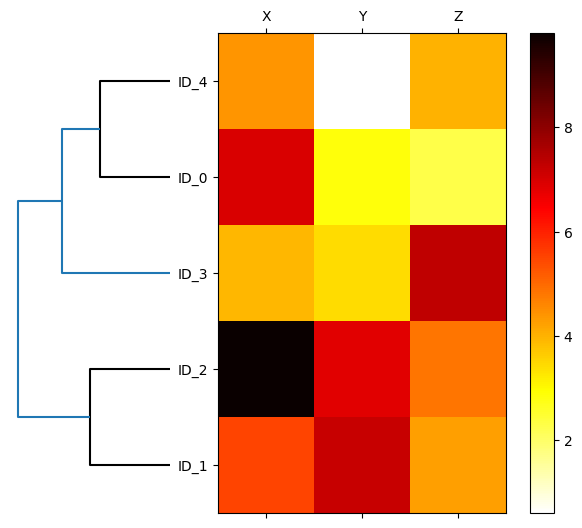

In [89]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([.09, .1, .2, .6])

row_dendr = dendrogram(
    row_clusters,
    orientation='left'
)

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([.23, .1, .6, .6])

cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)

axm.set_xticklabels(['', *df_rowclust.columns.tolist()])
axm.set_yticklabels(['', *df_rowclust.index.tolist()])

plt.show()

### Agg. Clustering w/ Complete Linkage (Sklearn Implementation)

In [91]:
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')

labels = ac.fit_predict(X)

print(f'Cluster Labels: {labels}')

Cluster Labels: [1 0 0 2 1]


In [93]:
''' pruning for ID_3 '''
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')

labels = ac.fit_predict(X)

print(f'Cluster Labels: {labels}')

Cluster Labels: [0 1 1 0 0]


## Density Based Spatial Clustering of Applications with Noise (DBSCAN)

### Comparing KMeans, Agg. Clustering, and DBSCAN on half moon shaped structures

#### Creating Dataset

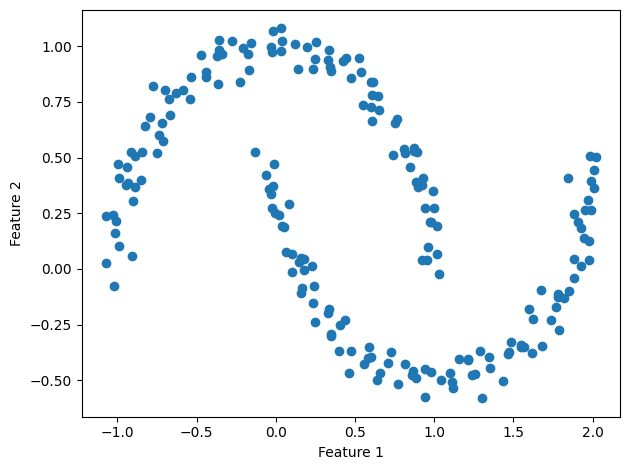

In [97]:
X, y = make_moons(n_samples=200, noise=.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

#### Building Visualization

Text(0, 0.5, 'Feature 2')

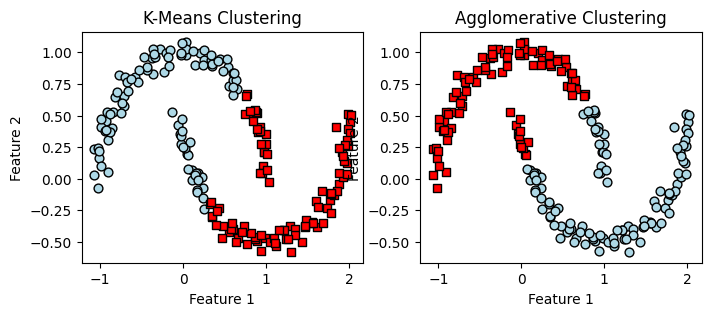

In [101]:
km = KMeans(n_clusters=2, random_state=0, n_init='auto')
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
db = DBSCAN(eps=.2, min_samples=5, metric='euclidean')

y_km = km.fit_predict(X)
y_ac = ac.fit_predict(X)
y_db = db.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

ax1.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='Cluster 1'
)

ax1.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    c='red',
    edgecolor='black',
    marker='s',
    s=40,
    label='Cluster 2'
)

ax1.set_title("K-Means Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

ax2.scatter(
    X[y_ac == 0, 0],
    X[y_ac == 0, 1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='Cluster 1'
)

ax2.scatter(
    X[y_ac == 1, 0],
    X[y_ac == 1, 1],
    c='red',
    edgecolor='black',
    marker='s',
    s=40,
    label='Cluster 2'
)

ax2.set_title("Agglomerative Clustering")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

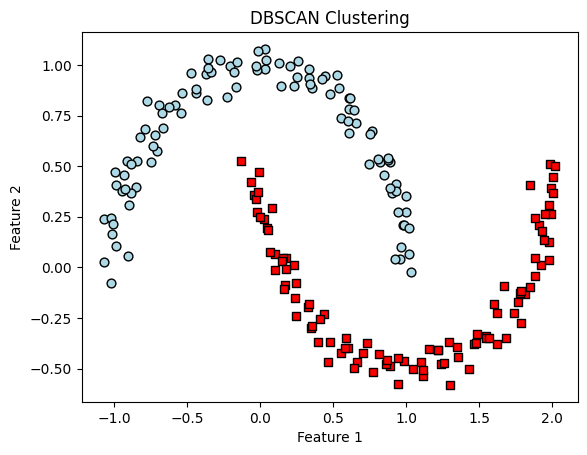

In [105]:
plt.scatter(
    X[y_db == 0, 0],
    X[y_db == 0, 1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='Cluster 1'
)

plt.scatter(
    X[y_db == 1, 0],
    X[y_db == 1, 1],
    c='red',
    edgecolor='black',
    marker='s',
    s=40,
    label='Cluster 2'
)

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()